In [34]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [35]:
# Load in csv
raw_df = pd.read_csv("../Project3/dataforfinalproject/RECS_COMBINED_DATA.csv")
raw_df = raw_df.drop(columns=['RECSYEAR', 
                              'DOEID',
                              'REGIONNAME',
                              'DIVISIONNAME',
                              'COUNTRY',
                              'PERIODFO', 
                              'PERIODLP', 
                              'PERIODEL', 
                              'PERIODNG',
                              'NWEIGHT'])
raw_df.head()
raw_df.shape

C:\Users\justi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (145,146,147,148) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(21430, 186)

In [36]:
scaled_data = preprocessing.scale(raw_df.T)

In [37]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [38]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

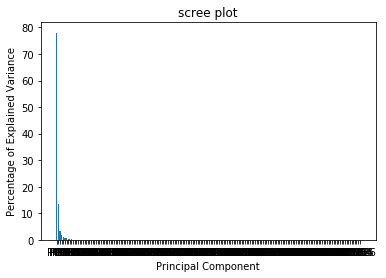

In [39]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('scree plot')
#plt.savefig('C:/Users/justi/Desktop/homework/Project3/dataforfinalproject/Pictures/PCAscree.png')
plt.show()

In [40]:
pca_df = pd.DataFrame(pca_data, columns=labels)

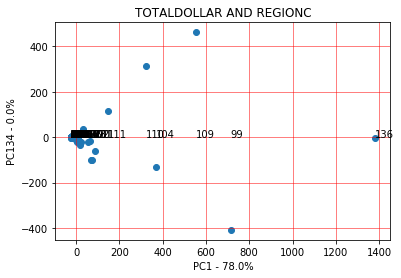

In [41]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('TOTALDOLLAR AND REGIONC')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC134 - {0}%'.format(per_var[133]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC134.loc[sample]))

plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
#plt.savefig('C:/Users/justi/Desktop/homework/Project3/dataforfinalproject/Pictures/PCAscatter2.png')
plt.show()


# Predictive Modeling with PCA Components

In [42]:
#convert it to numpy arrays
X=raw_df.values

In [43]:
#scaling the values
X = scale(X)
#grab number of components from shape output
pca = PCA(n_components=186)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=186, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [44]:
var= pca.explained_variance_ratio_

In [45]:
#this function returns the vectors used for the Elbow Curve
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [46]:
print(var1)

[ 12.89  21.31  28.79  35.42  40.3   44.25  46.68  48.94  50.77  52.56
  54.28  55.79  57.14  58.38  59.59  60.78  61.93  63.02  64.09  65.12
  66.13  67.07  67.91  68.74  69.54  70.33  71.08  71.81  72.52  73.2
  73.84  74.46  75.07  75.65  76.22  76.78  77.33  77.87  78.4   78.92
  79.44  79.95  80.45  80.95  81.44  81.92  82.39  82.85  83.3   83.74
  84.18  84.61  85.03  85.45  85.85  86.24  86.63  87.01  87.38  87.74
  88.09  88.43  88.76  89.08  89.4   89.71  90.02  90.32  90.61  90.9
  91.18  91.46  91.73  92.    92.26  92.51  92.76  92.99  93.21  93.43
  93.65  93.87  94.08  94.29  94.49  94.69  94.88  95.06  95.24  95.42
  95.59  95.76  95.93  96.09  96.25  96.4   96.55  96.69  96.83  96.96
  97.09  97.21  97.33  97.44  97.55  97.66  97.76  97.86  97.96  98.05
  98.14  98.22  98.3   98.38  98.45  98.52  98.59  98.66  98.72  98.78
  98.84  98.9   98.95  99.    99.05  99.1   99.15  99.19  99.23  99.27
  99.31  99.35  99.39  99.43  99.46  99.49  99.52  99.55  99.58  99.61
  99.64 

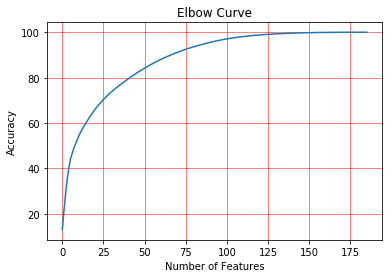

In [47]:
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.title('Elbow Curve')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.plot(var1)
#plt.savefig('C:/Users/justi/Desktop/homework/Project3/dataforfinalproject/Pictures/PCAelbow.png')

# Create final features list with raw_df column names


In [18]:
pca = PCA(n_components=150)
pca.fit(X)
X1=pca.fit_transform(X)

In [19]:
print(X1)

[[ 6.89120994e+00 -2.19237141e+00  4.72660671e+00 ... -3.55362161e-02
  -3.68359222e-02 -1.23139593e-02]
 [ 6.39014919e+00 -2.49650738e+00  3.23641127e+00 ... -2.82904620e-02
  -5.09893117e-04 -2.51956962e-01]
 [ 3.57660512e+01  9.48305893e+01 -4.40576849e+00 ... -4.70606788e-02
   1.16147641e-02 -4.42783556e-02]
 ...
 [-2.85951896e+00 -2.24733298e-02 -7.21409314e+00 ...  3.56132883e-02
   4.22922276e-03  4.16440854e-02]
 [-1.90264440e+00  1.26916868e+00 -1.71706075e-01 ... -1.38311636e-03
  -5.14207215e-02  8.71916784e-03]
 [-3.44669650e+00  5.85146804e-01 -6.09817674e+00 ...  6.42968168e-02
  -2.31537353e-02  9.21404241e-02]]


In [20]:
X1_df = pd.DataFrame(X1)
X1_df.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,6.891210,-2.192371,4.726607,-2.162731,-0.617231,-1.452677,2.369313,-4.623661,-0.352252,0.952654,...,0.041334,-0.007639,0.022552,-0.022182,-0.031675,0.018209,0.078436,-0.035536,-0.036836,-0.012314
1,6.390149,-2.496507,3.236411,-0.030635,-1.639072,-0.731552,3.195133,-2.194533,-1.642337,-2.250529,...,0.048310,0.060396,0.002043,-0.071937,-0.032306,0.204050,0.234529,-0.028290,-0.000510,-0.251957
2,35.766051,94.830589,-4.405768,23.048880,1.958416,-1.525357,4.925539,-0.225927,-1.008678,-0.945457,...,0.124174,-0.026052,0.024140,-0.003969,0.007461,-0.217863,0.272398,-0.047061,0.011615,-0.044278
3,34.449212,95.356682,-3.023752,22.114696,1.855119,-1.858289,4.986314,-0.283884,-0.258744,-1.822265,...,0.108138,-0.016836,-0.014478,0.036398,-0.030615,0.077861,0.111965,-0.011692,0.062058,-0.039233
4,36.194599,94.680864,-5.015680,23.339673,1.784379,-1.333215,4.150996,0.319822,-1.563116,-1.325836,...,0.085600,0.016441,0.040774,0.017408,-0.063149,0.232181,0.150995,-0.004258,0.060453,-0.061104


In [21]:
features2 = ['REGIONC',
 'DIVISION',
 'TYPEHUQ',
 'CELLAR',
 'STORIES',
 'PRKGPLC1',
 'YEARMADE',
 'OCCUPYY',
 'BEDROOMS',
 'NCOMBATH',
 'NHAFBATH',
 'OTHROOMS',
 'TOTROOMS',
 'DOOR1SUM',
 'WINDOWS',
 'ADQINSUL',
 'DRAFTY',
 'UGASHERE',
 'FUELPOOL',
 'SIZRFRI1',
 'TYPERFR1',
 'AGERFRI1',
 'ICE',
 'SIZRFRI2',
 'TYPERFR2',
 'AGERFRI2',
 'NUMFREEZ',
 'SIZFREEZ',
 'AGEFRZR',
 'STOVENFUEL',
 'OVENUSE',
 'AMTMICRO',
 'NUMMEAL',
 'TOASTER',
 'COFFEE',
 'DWASHUSE',
 'WASHLOAD',
 'WASHTEMP',
 'RNSETEMP',
 'DRYRUSE',
 'EQUIPM',
 'FUELHEAT',
 'EQUIPAGE',
 'PROTHERM',
 'TEMPHOME',
 'TEMPGONE',
 'TEMPNITE',
 'EQUIPAUX',
 'REVERSE',
 'WARMAIR',
 'STEAMR',
 'PERMELEC',
 'PIPELESS',
 'ROOMHEAT',
 'WOODKILN',
 'CARRYEL',
 'CARRYKER',
 'CHIMNEY',
 'RANGE',
 'DIFEQUIP',
 'ELECAUX',
 'UGASAUX',
 'LPGAUX',
 'FOKRAUX',
 'WOODAUX',
 'OTHERAUX',
 'ATTCHEAT',
 'GARGHEAT',
 'COOLTYPE',
 'AGECENAC',
 'USECENAC',
 'NUMBERAC',
 'WWACAGE',
 'USEWWAC',
 'NUMCFAN',
 'FUELH2O',
 'WHEATAGE',
 'WHEATSIZ',
 'LGTOUTNUM',
 'ESDISHW',
 'PGASHEAT',
 'LPGPAY',
 'FOPAY',
 'HHSEX',
 'HHAGE',
 'EMPLOYHH',
 'HOUSEHOLDER_RACE',
 'NHSLDMEM',
 'ATHOME',
 'MONEYPY',
 'ELWATER',
 'LPOTHER',
 'TOTCSQFT',
 'TOTHSQFT',
 'TOTUSQFT',
 'CDD65',
 'HDD65',
 'GALLONLP',
 'CUFEETNG',
 'BTUEL',
 'BTUELSPH',
 'BTUELCOL',
 'BTUELWTH',
 'BTUELRFG',
 'BTUELOTH',
 'BTULP',
 'BTULPSPH',
 'BTULPWTH',
 'BTULPOTH',
 'BTUNG',
 'BTUNGSPH',
 'BTUNGWTH',
 'BTUNGOTH',
 'BTUFO',
 'BTUFOSPH',
 'BTUFOWTH',
 'BTUFOOTH',
 'DOLLARNG',
 'DOLNGSPH',
 'DOLNGWTH',
 'DOLNGOTH',
 'DOLLAREL',
 'DOLELSPH',
 'DOLELCOL',
 'DOLELWTH',
 'DOLELRFG',
 'DOLELOTH',
 'DOLLARLP',
 'DOLLPSPH',
 'DOLLPWTH',
 'DOLLPOTH',
 'DOLLARFO',
 'DOLFOSPH',
 'DOLFOWTH',
 'DOLFOOTH',
 'GALLONFO',
 'TOTALBTU',
 'TOTALDOLLAR',
 'WOODAMT',
 'KOWNRENT',
 'SWIMPOOL',
 'POOL',
 'RECBATH',
 'FUELTUB',
 'NUMFRIG',
 'UPRTFRZR',
 'STOVEN',
 'STOVE',
 'OVEN',
 'MICRO']

In [22]:
X1_df.columns = [features2]
X1_df.head()

,REGIONC,DIVISION,TYPEHUQ,CELLAR,STORIES,PRKGPLC1,YEARMADE,OCCUPYY,BEDROOMS,NCOMBATH,...,SWIMPOOL,POOL,RECBATH,FUELTUB,NUMFRIG,UPRTFRZR,STOVEN,STOVE,OVEN,MICRO
0,6.891210,-2.192371,4.726607,-2.162731,-0.617231,-1.452677,2.369313,-4.623661,-0.352252,0.952654,...,0.041334,-0.007639,0.022552,-0.022182,-0.031675,0.018209,0.078436,-0.035536,-0.036836,-0.012314
1,6.390149,-2.496507,3.236411,-0.030635,-1.639072,-0.731552,3.195133,-2.194533,-1.642337,-2.250529,...,0.048310,0.060396,0.002043,-0.071937,-0.032306,0.204050,0.234529,-0.028290,-0.000510,-0.251957
2,35.766051,94.830589,-4.405768,23.048880,1.958416,-1.525357,4.925539,-0.225927,-1.008678,-0.945457,...,0.124174,-0.026052,0.024140,-0.003969,0.007461,-0.217863,0.272398,-0.047061,0.011615,-0.044278
3,34.449212,95.356682,-3.023752,22.114696,1.855119,-1.858289,4.986314,-0.283884,-0.258744,-1.822265,...,0.108138,-0.016836,-0.014478,0.036398,-0.030615,0.077861,0.111965,-0.011692,0.062058,-0.039233
4,36.194599,94.680864,-5.015680,23.339673,1.784379,-1.333215,4.150996,0.319822,-1.563116,-1.325836,...,0.085600,0.016441,0.040774,0.017408,-0.063149,0.232181,0.150995,-0.004258,0.060453,-0.061104


In [23]:
#export to CSV
X1_df.to_csv("../Project3/dataforfinalproject/PCAcomponentoutput.csv")

In [ ]:
resources used:
#Original PCA model
#https://www.youtube.com/watch?v=Lsue2gEM9D0

#Predictive Modeling with PCA
#https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/